In [1]:
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/hypothesis-test-socio-economic-data.csv')
df

,District,Sex Ratio (females every 1000 males),Total_Positives,total_deaths,male_deaths,female_deaths,Male cases (in data),Female cases (in data),Estimated Male cases,Estimated Female Cases,...,Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Households with electricity (%),Households with an improved drinking-water source1 (%),Households using improved sanitation facility2 (%),Households using clean fuel for cooking3 (%),Households using iodized salt (%),Households with any usual member covered by a health scheme or health insurance (%),Women who are literate (%),Men who are literate (%)
0,Bangalore,898,94106,299,196,103,14096,8401,39172.031970,23345.930800,...,0.4,0.7,99.4,92.0,86.2,93.9,95.9,15.4,87.0,92.7
1,Bellary,952,15180,31,23,8,1396,634,6935.034971,3149.578920,...,0.6,2.5,98.1,94.4,40.7,46.7,76.9,21.5,53.1,78.0
2,Mysore,1008,11489,55,37,18,822,445,4951.820981,2680.730336,...,0.5,1.2,97.2,95.6,63.6,66.7,86.1,33.0,70.5,86.9
3,Dakshina Kannada,1032,9296,43,32,11,1686,899,4027.918193,2147.745228,...,1.4,1.0,97.8,85.7,92.0,54.2,74.5,34.7,83.7,91.2
4,Gulbarga,989,9265,27,16,11,1219,774,3764.690985,2390.378033,...,0.4,0.4,98.2,94.9,29.1,35.1,85.8,22.9,54.3,79.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Jabalpur,955,382,14,6,8,249,133,249.000000,133.000000,...,0.9,0.6,94.6,96.6,47.5,48.5,91.2,36.3,73.7,87.6
63,Rajkot,916,2342,56,35,21,1599,743,1599.000000,743.000000,...,0.7,0.0,98.6,91.7,72.3,65.2,98.4,19.3,82.7,91.9
64,Surat,881,3583,264,176,88,2478,1105,2478.000000,1105.000000,...,0.8,0.6,98.3,93.4,77.4,83.4,97.9,19.1,81.0,92.5
65,Thane,922,7047,241,163,78,4361,2686,4361.000000,2686.000000,...,0.6,0.0,90.6,92.0,64.7,76.7,93.5,15.7,78.4,92.8


<p> Selecting those districts that have at least five male deaths and five female deaths </p>

In [3]:
df = df[(df['male_deaths'] >= 5) & (df['female_deaths'] >= 5)]

<h1> Computing social index according to Feature Importances </h1> 

<p> Using All KA + TN Feature Importances </p>

In [4]:
rf_imp = [0.12023391, 0.1961597 , 0.17087538, 0.14839217, 0.16829211, 0.19604673]

In [5]:
df['social_index'] = df['Households with electricity (%)']*rf_imp[0] \
                    + df['Households with an improved drinking-water source1 (%)']*rf_imp[1] \
                    + df['Households using improved sanitation facility2 (%)']*rf_imp[2] \
                    + df['Households using clean fuel for cooking3 (%)']*rf_imp[3] \
                    + df['Households using iodized salt (%)']*rf_imp[4] \
                    + df['Households with any usual member covered by a health scheme or health insurance (%)']*rf_imp[5]

<ipython-input-5-6719da86ed94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['social_index'] = df['Households with electricity (%)']*rf_imp[0] \


In [6]:
print(df.social_index.max(), df[df['social_index'] == df.social_index.max()].District)
print(df.social_index.min(), df[df['social_index'] == df.social_index.min()].District)

83.273811619 33    Coimbatore
Name: District, dtype: object
56.244045761 9    Raichur
Name: District, dtype: object


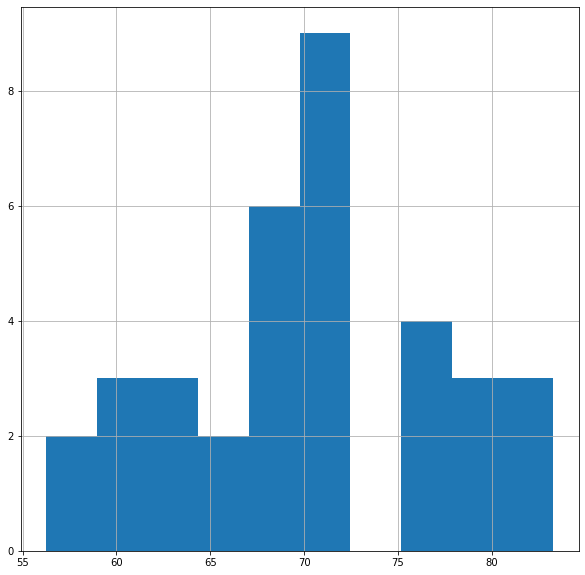

In [7]:
plt.figure(figsize=(10,10))
df.social_index.hist()

<p> Computing literacy using sex ratio of each district </p>

In [8]:
df['Literate'] = (df['Men who are literate (%)'] * 1000 + df['Women who are literate (%)'] * df['Sex Ratio (females every 1000 males)']) / (1000 + df['Sex Ratio (females every 1000 males)'])

<ipython-input-8-26f29940b181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Literate'] = (df['Men who are literate (%)'] * 1000 + df['Women who are literate (%)'] * df['Sex Ratio (females every 1000 males)']) / (1000 + df['Sex Ratio (females every 1000 males)'])


In [9]:
df.columns

Index(['District', 'Sex Ratio (females every 1000 males)', 'Total_Positives',
       'total_deaths', 'male_deaths', 'female_deaths', 'Male cases (in data)',
       'Female cases (in data)', 'Estimated Male cases',
       'Estimated Female Cases', 'Male Mortality', 'Female Mortality', 'State',
       'Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%)',
       'Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%)',
       'Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%)',
       'Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%)',
       'All women age 15-49 years who are anaemic (%)',
       'Men age 15-49 years who are anaemic (<13.0 g/dl) (%)',
       'Women Blood sugar level - high (>140 mg/dl) (%)',
       'Men Blood sugar level - high (>140 mg/dl) (%)',
       'Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)',
       'Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)',
   

In [10]:
df['Mortality'] = (df['male_deaths'] + df['female_deaths']) / (df['Estimated Female Cases'] + df['Estimated Male cases'])

<ipython-input-10-a2c2f291eba2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mortality'] = (df['male_deaths'] + df['female_deaths']) / (df['Estimated Female Cases'] + df['Estimated Male cases'])


In [11]:
def segregateUsingControlVar(df, control, cols):
    median_control = df[control].median()
    print(median_control)
    
    df['label'] = 0 # Creating column
    df.loc[(df[control] > median_control), 'label'] = 1
    df.loc[(df[control] <= median_control), 'label'] = 0
    l = df[df['label'] == 0]
    h = df[df['label'] == 1]
    print("Number of districts in l half", l.shape)
    print("Number of districts in h half", h.shape)
    l = l[cols]
    h = h[cols]
    return l, h

In [12]:
def hypothesisTestUsingControlVar(df):
    df['Male_death_ratio'] = df['male_deaths'] / df['Estimated Male cases']
    df['Female_death_ratio'] = df['female_deaths'] / df['Estimated Female Cases']
    
    df['P'] = (df['Female_death_ratio'] * df['Estimated Female Cases'] + df['Male_death_ratio'] * df['Estimated Male cases']) / (df['Estimated Female Cases'] + df['Estimated Male cases'])
    df['SE'] = (df['P'] * (1 - df['P']) * (1 / df['Estimated Female Cases'] + 1 / df['Estimated Male cases']))**0.5
    df['z'] = (df['Female_death_ratio'] - df['Male_death_ratio']) / df['SE']
    df['p_value'] = stats.norm.sf(abs(df['z']))*2
    
    df['difference_ratio'] = df['Female_death_ratio'] - df['Male_death_ratio']
    df['95_CI_low'] = df['difference_ratio'] - df['SE']
    df['95_CI_high'] = df['difference_ratio'] + df['SE']

In [13]:
cols = [
    'District', 
    'male_deaths', 
    'female_deaths', 
    'Estimated Male cases',
    'Estimated Female Cases', 
    'Male Mortality', 
    'Female Mortality', 
    'State'
]

l, h = segregateUsingControlVar(df, "social_index", cols)
hypothesisTestUsingControlVar(l)
hypothesisTestUsingControlVar(h)

70.269974118
Number of districts in l half (18, 35)
Number of districts in h half (17, 35)


<ipython-input-11-c2ef8ecf1a5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = 0 # Creating column
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
l[l['p_value'] <= 0.05]

,District,male_deaths,female_deaths,Estimated Male cases,Estimated Female Cases,Male Mortality,Female Mortality,State,Male_death_ratio,Female_death_ratio,P,SE,z,p_value,difference_ratio,95_CI_low,95_CI_high
6,Belgaum,26,5,3666.00792,1887.837412,0.007092183,0.002649,KA,0.007092,0.002649,0.005582,0.002111,-2.105491,0.035249,-0.004444,-0.006554,-0.002333


In [15]:
h[h['p_value'] <= 0.05]

,District,male_deaths,female_deaths,Estimated Male cases,Estimated Female Cases,Male Mortality,Female Mortality,State,Male_death_ratio,Female_death_ratio,P,SE,z,p_value,difference_ratio,95_CI_low,95_CI_high
31,Chennai,183,82,51363.629620,32436.942370,0.003562832,0.002528,TN,0.003563,0.002528,0.003162,0.000398,-2.598904,0.009352,-0.001035,-0.001433,-0.000637
33,Coimbatore,15,6,2289.413880,4578.827760,0.006551895,0.001310,TN,0.006552,0.001310,0.003058,0.001413,-3.708955,0.000208,-0.005242,-0.006655,-0.003828
47,Salem,6,8,3181.033768,1373.628218,0.001886179,0.005824,TN,0.001886,0.005824,0.003074,0.001787,2.203324,0.027572,0.003938,0.002151,0.005725
61,Indore,93,29,2865.000000,1799.000000,0.032460732984293,0.016120,MP,0.032461,0.016120,0.026158,0.004801,-3.403482,0.000665,-0.016341,-0.021142,-0.011540


In [16]:
social_l = l[[
    'District',
    'Male_death_ratio',
    'Female_death_ratio'
]]

social_h = h[[
    'District',
    'Male_death_ratio',
    'Female_death_ratio'
]]

In [17]:
l, h = segregateUsingControlVar(df, "Literate", cols)
hypothesisTestUsingControlVar(l)
hypothesisTestUsingControlVar(h)

80.85
Number of districts in l half (18, 35)
Number of districts in h half (17, 35)


<ipython-input-11-c2ef8ecf1a5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = 0 # Creating column


In [18]:
l[l['p_value'] <= 0.05]

,District,male_deaths,female_deaths,Estimated Male cases,Estimated Female Cases,Male Mortality,Female Mortality,State,Male_death_ratio,Female_death_ratio,P,SE,z,p_value,difference_ratio,95_CI_low,95_CI_high
6,Belgaum,26,5,3666.007920,1887.837412,0.007092183,0.002649,KA,0.007092,0.002649,0.005582,0.002111,-2.105491,0.035249,-0.004444,-0.006554,-0.002333
47,Salem,6,8,3181.033768,1373.628218,0.001886179,0.005824,TN,0.001886,0.005824,0.003074,0.001787,2.203324,0.027572,0.003938,0.002151,0.005725


In [19]:
h[h['p_value'] <= 0.05]

,District,male_deaths,female_deaths,Estimated Male cases,Estimated Female Cases,Male Mortality,Female Mortality,State,Male_death_ratio,Female_death_ratio,P,SE,z,p_value,difference_ratio,95_CI_low,95_CI_high
31,Chennai,183,82,51363.62962,32436.94237,0.003562832,0.002528,TN,0.003563,0.002528,0.003162,0.000398,-2.598904,0.009352,-0.001035,-0.001433,-0.000637
33,Coimbatore,15,6,2289.41388,4578.82776,0.006551895,0.001310,TN,0.006552,0.001310,0.003058,0.001413,-3.708955,0.000208,-0.005242,-0.006655,-0.003828
61,Indore,93,29,2865.00000,1799.00000,0.032460732984293,0.016120,MP,0.032461,0.016120,0.026158,0.004801,-3.403482,0.000665,-0.016341,-0.021142,-0.011540


In [20]:
literacy_l = l[[
    'District'
]]

literacy_h = h[[
    'District'
]]

ll_intersection = pd.merge(social_l, literacy_l, how='inner', on=['District'])
lh_intersection = pd.merge(social_l, literacy_h, how='inner', on=['District'])
hl_intersection = pd.merge(social_h, literacy_l, how='inner', on=['District'])
hh_intersection = pd.merge(social_h, literacy_h, how='inner', on=['District'])

In [21]:
ll_intersection[ll_intersection['Male_death_ratio'] < ll_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
1,Gulbarga,0.004250,0.004602
4,Raichur,0.003688,0.004291
5,Koppal,0.004449,0.006815
6,Tumkur,0.005390,0.008730
7,Chikkaballapura,0.004078,0.007696
11,Jabalpur,0.024096,0.060150
12,Varanasi,0.027287,0.037736


In [22]:
ll_intersection[ll_intersection['Male_death_ratio'] > ll_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
0,Bellary,0.003316,0.002540
2,Belgaum,0.007092,0.002649
3,Davanagere,0.007157,0.004331
8,Haveri,0.007468,0.007372
9,Tiruvannamalai,0.004949,0.002648
10,Virudhunagar,0.002658,0.002481


In [23]:
lh_intersection[lh_intersection['Male_death_ratio'] < lh_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
0,Shimoga,0.003802,0.004522
2,Thoothukkudi,0.001614,0.001766


In [24]:
lh_intersection[lh_intersection['Male_death_ratio'] > lh_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
1,Bidar,0.007350,0.006040
3,Tirunelveli,0.003155,0.002193
4,Thane,0.037377,0.029039


In [25]:
hl_intersection[hl_intersection['Male_death_ratio'] < hl_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
3,Salem,0.001886,0.005824


In [26]:
hl_intersection[hl_intersection['Male_death_ratio'] > hl_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
0,Mysore,0.007472,0.006715
1,Dharwad,0.006417,0.006076
2,Hassan,0.009335,0.007552
4,Theni,0.002259,0.002033


In [27]:
hh_intersection[hh_intersection['Male_death_ratio'] < hh_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
4,Kancheepuram,0.002902,0.003415
7,Thiruvallur,0.003688,0.004421
8,Vellore,0.002158,0.003453
10,Rajkot,0.021889,0.028264
11,Surat,0.071025,0.079638


In [28]:
hh_intersection[hh_intersection['Male_death_ratio'] > hh_intersection['Female_death_ratio']]

,District,Male_death_ratio,Female_death_ratio
0,Bangalore,0.005004,0.004412
1,Dakshina Kannada,0.007945,0.005122
2,Chennai,0.003563,0.002528
3,Coimbatore,0.006552,0.001310
5,Kanniyakumari,0.003594,0.002290
6,Madurai,0.005233,0.005022
9,Indore,0.032461,0.016120


## Grouping according to Social Index

<table>
  <tr>
      <td rowspan="10"><b>Low Social Index</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
  <tr>
    <td>Gulbarga</td>
    <td>Bellary</td>
  </tr>
  <tr>
    <td>Raichur</td>
    <td><b>Belgaum</b></td>
  </tr>
  <tr>
    <td>Shimoga</td>
    <td>Davanagere</td>
  </tr>
  <tr>
    <td>Koppal</td>
    <td>Bidar</td>
  </tr>
  <tr>
    <td>Haveri</td>
    <td>Bellary</td>
  </tr>
  <tr>
    <td>Tumkur</td>
    <td>Haveri</td>
  </tr>
  <tr>
    <td>Chikkaballapura</td>
    <td>Tirunelveli</td>
  </tr>
  <tr>
    <td>Jabalpur</td>
    <td>Virudhunagar</td>
  </tr>
  <tr>
    <td>Varanasi</td>
    <td>Thane</td>
  </tr>
  <tr>
</table>

<table>
  <tr>
      <td rowspan="12"><b>High Social Index</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
  <tr>
    <td>Kancheepuram</td>
    <td>Bangalore</td>
  </tr>
  <tr>
      <td><b>Salem</b></td>
    <td>Mysore</td>
  </tr>
  <tr>
    <td>Thiruvallur</td>
    <td>Dakshina Kannada</td>
  </tr>
  <tr>
    <td>Vellore</td>
    <td>Dharwad</td>
  </tr>
  <tr>
    <td>Rajkot</td>
    <td>Hassan</td>
  </tr>
  <tr>
    <td>Surat</td>
      <td><b>Chennai</b></td>
  </tr>
  <tr>
    <td> </td>
      <td><b>Coimbatore</b></td>
  </tr>
  <tr>
    <td> </td>
    <td>Kanniyakumari</td>
  </tr>
  <tr>
    <td> </td>
    <td>Madurai</td>
  </tr>
  <tr>
    <td> </td>
    <td>Theni</td>
  </tr>
  <tr>
    <td> </td>
      <td><b>Indore</b></td>
  </tr>
</table>

## Grouping according to Literacy Rate

<table>
  <tr>
      <td rowspan="11"><b>Low Literacy Rate</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
<tr>
    <td>Gulbarga</td>
    <td>Bellary</td>
</tr>
<tr>
    <td>Raichur</td>
    <td>Mysore</td>
</tr>
<tr>
    <td>Koppal</td>
    <td><b>Belgaum</b></td>
</tr>
<tr>
    <td>Tumkur</td>
    <td>Dharwad</td>
</tr>
<tr>
    <td>Chikkaballapura</td>
    <td>Davanagere</td>
</tr>
<tr>
    <td><b>Salem</b></td>
    <td>Hassan</td>
</tr>
<tr>
    <td>Jabalpur</td>
    <td>Haveri</td>
</tr>
<tr>
    <td>Varanasi</td>
    <td>Theni</td>
</tr>
<tr>
    <td> </td>
    <td>Tiruvannamalai</td>
</tr>
<tr>
    <td> </td>
    <td>Virudhunagar</td>
</tr>
</table>


<table>
<tr>
      <td rowspan="11"><b>High Literacy Rate</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
</tr>
<tr>
    <td>Shimoga</td>
    <td>Bangalore</td>
</tr>
<tr>
    <td>Kancheepuram</td>
    <td>Dakshina Kannada</td>
</tr>
<tr>
    <td>Thiruvallur</td>
    <td>Bidar</td>
</tr>
<tr>
    <td>Thoothukkudi</td>
    <td><b>Chennai</b></td>
</tr>
<tr>
    <td>Vellore</td>
    <td><b>Coimbatore</b></td>
</tr>
<tr>
    <td>Rajkot</td>
    <td>Kanniyakumari</td>
</tr>
<tr>
    <td>Surat</td>
    <td>Madurai</td>
</tr>
<tr>
    <td> </td>
    <td>Tirunelveli</td>
</tr>
<tr>
    <td> </td>
    <td><b>Indore</b></td>
</tr>
<tr>
<td> </td>
<td>Thane</td>
</tr>
</table>

## Grouping according to Social Index and Literacy Rate

<table>
  <tr>
      <td rowspan="10"><b>Low Social Index, Low Literacy Rate</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
  <tr>
    <td>Gulbarga</td>
    <td>Bellary</td>
</tr>
<tr>
    <td>Raichur</td>
    <td>Davanagere</td>
</tr>
<tr>
    <td>Koppal</td>
    <td>Virudhunagar</td>
</tr>
<tr>
    <td>Tumkur</td>
    <td><b>Belgaum</b></td>
</tr>
<tr>
    <td>Chikkaballapura</td>
    <td>Haveri</td>
</tr>
<tr>
    <td>Jabalpur</td>
    <td>Tiruvannamalai</td>
</tr>
<tr>
    <td>Varanasi</td>
    <td> </td>
</tr>
</table>

<table>
  <tr>
      <td rowspan="4"><b>Low Social Index, High Literacy Rate</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
  <tr>
    <td>Shimoga</td>
    <td>Tirunelveli</td>
  </tr>
  <tr>
    <td>Thoothukkudi</td>
    <td>Thane</td>
  </tr>
  <tr>
    <td> </td>
    <td>Bidar</td>
  </tr>
</table>



<table>
  <tr>
      <td rowspan="5"><b>High Social Index, Low Literacy Rate</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
  <tr>
      <td><b>Salem</b></td>
    <td>Mysore</td>
  </tr>
  <tr>
    <td> </td>
    <td>Dharwad</td>
  </tr>
  <tr>
    <td> </td>
    <td>Hassan</td>
  </tr>
  <tr>
    <td> </td>
    <td>Theni</td>
  </tr>
</table>

<table>
  <tr>
      <td rowspan="8"><b>Low Social Index, High Literacy Rate</b></td>
      <td><b>Female Mortality Higher</b></td>
      <td><b>Male Mortality Higher</b></td>
  </tr>
 <tr>
    <td>Kancheepuram</td>
    <td>Bangalore</td>
  </tr>
<tr>
    <td>Thiruvallur</td>
    <td>Dakshina Kannada</td>
</tr>
<tr>
    <td>Vellore</td>
    <td><b>Chennai</b></td>
</tr>
<tr>
    <td>Rajkot</td>
    <td><b>Coimbatore</b></td>
</tr>
<tr>
    <td>Surat</td>
    <td>Kanniyakumari</td>
</tr>
<tr>
    <td> </td>
    <td>Madurai</td>
</tr>
<tr>
    <td> </td>
    <td><b>Indore</b></td>
</tr>
</table>

In [29]:
d = df[['District', 'male_deaths', 'female_deaths', 'Estimated Male cases',
       'Estimated Female Cases', 'Male Mortality', 'Female Mortality', 'State']]
d

,District,male_deaths,female_deaths,Estimated Male cases,Estimated Female Cases,Male Mortality,Female Mortality,State
0,Bangalore,196,103,39172.031970,23345.930800,0.00500357,0.004412,KA
1,Bellary,23,8,6935.034971,3149.578920,0.003316494,0.002540,KA
2,Mysore,37,18,4951.820981,2680.730336,0.007471999,0.006715,KA
3,Dakshina Kannada,32,11,4027.918193,2147.745228,0.007944551,0.005122,KA
4,Gulbarga,16,11,3764.690985,2390.378033,0.004250017,0.004602,KA
6,Belgaum,26,5,3666.007920,1887.837412,0.007092183,0.002649,KA
7,Dharwad,22,12,3428.656493,1975.049001,0.006416507,0.006076,KA
8,Davanagere,16,7,2235.540446,1616.277165,0.007157106,0.004331,KA
9,Raichur,8,6,2169.275792,1398.206197,0.003687867,0.004291,KA
11,Hassan,20,9,2142.539817,1191.760389,0.009334716,0.007552,KA


<p> Computing male and female mortality percentages </p>

In [30]:
d['male mortality %'] = (d['male_deaths'] / d['Estimated Male cases']) * 100
d['female mortality %'] = (d['female_deaths'] / d['Estimated Female Cases']) * 100
d

<ipython-input-30-c3bc3f821185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['male mortality %'] = (d['male_deaths'] / d['Estimated Male cases']) * 100
<ipython-input-30-c3bc3f821185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['female mortality %'] = (d['female_deaths'] / d['Estimated Female Cases']) * 100


,District,male_deaths,female_deaths,Estimated Male cases,Estimated Female Cases,Male Mortality,Female Mortality,State,male mortality %,female mortality %
0,Bangalore,196,103,39172.031970,23345.930800,0.00500357,0.004412,KA,0.500357,0.441190
1,Bellary,23,8,6935.034971,3149.578920,0.003316494,0.002540,KA,0.331649,0.254002
2,Mysore,37,18,4951.820981,2680.730336,0.007471999,0.006715,KA,0.747200,0.671459
3,Dakshina Kannada,32,11,4027.918193,2147.745228,0.007944551,0.005122,KA,0.794455,0.512165
4,Gulbarga,16,11,3764.690985,2390.378033,0.004250017,0.004602,KA,0.425002,0.460178
6,Belgaum,26,5,3666.007920,1887.837412,0.007092183,0.002649,KA,0.709218,0.264853
7,Dharwad,22,12,3428.656493,1975.049001,0.006416507,0.006076,KA,0.641651,0.607580
8,Davanagere,16,7,2235.540446,1616.277165,0.007157106,0.004331,KA,0.715711,0.433094
9,Raichur,8,6,2169.275792,1398.206197,0.003687867,0.004291,KA,0.368787,0.429121
11,Hassan,20,9,2142.539817,1191.760389,0.009334716,0.007552,KA,0.933472,0.755185


In [31]:
for i, r in d.iterrows():
    print(r['District'], round(r['male mortality %'], 2), round(r['female mortality %'], 2))

Bangalore 0.5 0.44
Bellary 0.33 0.25
Mysore 0.75 0.67
Dakshina Kannada 0.79 0.51
Gulbarga 0.43 0.46
Belgaum 0.71 0.26
Dharwad 0.64 0.61
Davanagere 0.72 0.43
Raichur 0.37 0.43
Hassan 0.93 0.76
Shimoga 0.38 0.45
Koppal 0.44 0.68
Bidar 0.74 0.6
Tumkur 0.54 0.87
Chikkaballapura 0.41 0.77
Haveri 0.75 0.74
Chennai 0.36 0.25
Coimbatore 0.66 0.13
Kancheepuram 0.29 0.34
Kanniyakumari 0.36 0.23
Madurai 0.52 0.5
Salem 0.19 0.58
Theni 0.23 0.2
Thiruvallur 0.37 0.44
Thoothukkudi 0.16 0.18
Tirunelveli 0.32 0.22
Tiruvannamalai 0.49 0.26
Vellore 0.22 0.35
Virudhunagar 0.27 0.25
Indore 3.25 1.61
Jabalpur 2.41 6.02
Rajkot 2.19 2.83
Surat 7.1 7.96
Thane 3.74 2.9
Varanasi 2.73 3.77
